### **Used Car Price Prediction (Regression Analysis)**

This notebook presents a complete machine learning workflow for predicting used car prices based on vehicle specifications and historical market data.

* *Import Data* 
* *Data Analysis (EDA)*
* *Data Cleaning* 
* *Feature Engineering* 
* *Model Training* 
* *Model Evaluation* 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('carsdata.csv')
print("Data Loaded!")
df.head()

Data Loaded!


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
print("Column Information:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB

Missing Values:
name                    0
year                    0
selling_price           0
km_driven               0
fu

In [4]:

df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
df['mileage(km/ltr/kg)'] = pd.to_numeric(df['mileage(km/ltr/kg)'], errors='coerce')

df.dropna(inplace=True)
print("Data Cleaning!")

Data Cleaning!


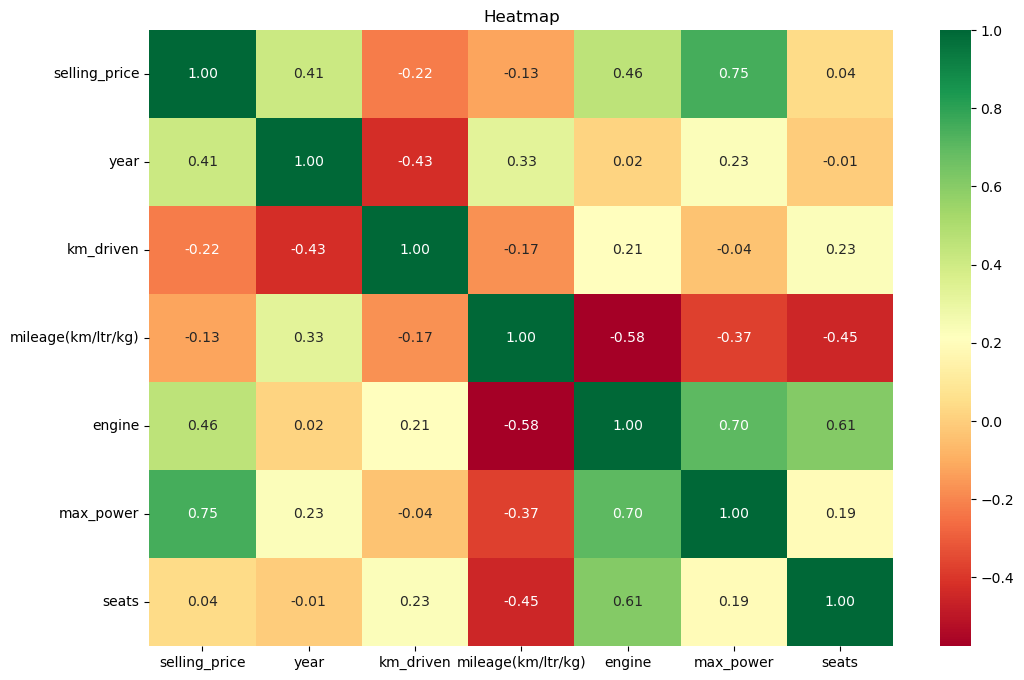

In [5]:
plt.figure(figsize=(12, 8))
numeric_cols = ['selling_price', 'year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='RdYlGn')
plt.title('Heatmap')
plt.show()

In [6]:

df_final = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
print("Categorical Encoding!")

Categorical Encoding!


In [7]:

X = df_final.drop(['name', 'selling_price'], axis=1)
y = df_final['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train n Test Size: {X_train.shape}")

Train n Test Size: (6324, 16)


In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("Model Training!")


Model Training!


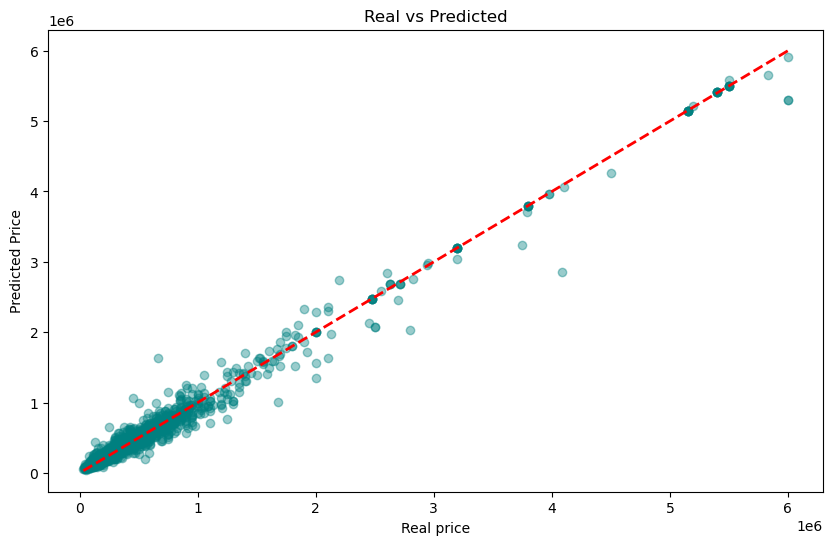

MAE (Średni błąd): 61101.79
R2 Score: 0.98


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Real price')
plt.ylabel('Predicted Price (INR)')
plt.title('Real vs Predicted Price Analysis')

exchange_rate = 25
mae_inr = mean_absolute_error(y_test, preds)
mae_pln = mae_inr / exchange_rate
r2 = r2_score(y_test, preds)

print(f"MAE (Średni błąd): {mae_inr:.2f} INR")
print(f"MAE w przeliczeniu na PLN: ~{mae_pln:.2f} PLN")
print(f"R2 Score: {r2:.2f}")

plt.show()